In [8]:
%load_ext autoreload
%autoreload 2
import numpy as np
from helper import visualize_input, plot_images
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Cargo imagenes

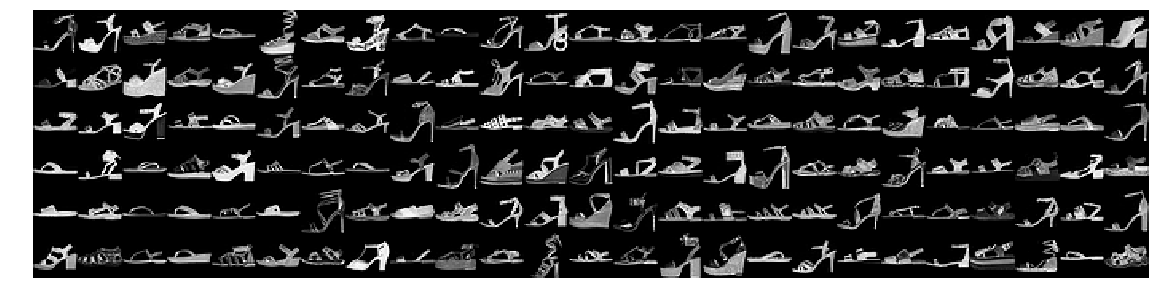

In [9]:
# Cargo las sandalias de disco.
sandalias_orig = np.load('sandalias.npy')
# Las grafico con la función plot_images
# plot_images(array con imageners, Cantidad a graficar, columnas)
div = 1
sandalias = (sandalias_orig/div).astype(int)
plot_images(sandalias,150, columns=25)

In [10]:
niveles = np.max(sandalias) + 1
niveles

256

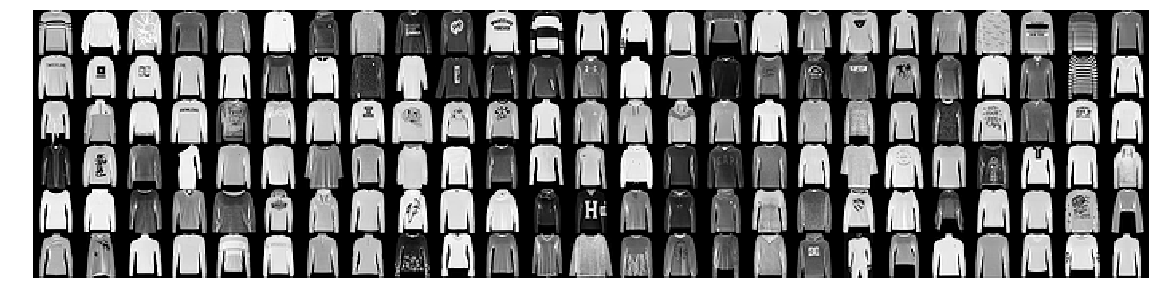

In [11]:
# Lo mismo para los buzos
buzos_orig = np.load('buzos.npy')
buzos = (buzos_orig/div).astype(int)
plot_images(buzos,150, columns=25)

In [12]:
# Imprimo las dimensiones
print('Dimensiones de sandalias: ', sandalias.shape)
print('Dimensiones de buzos: ', buzos.shape)

Dimensiones de sandalias:  (6000, 28, 28)
Dimensiones de buzos:  (6000, 28, 28)


Como se interpreta? Hay 6000 imágenes de sandalias de 28x28 pixeles  
Lo mismo para los buzos

## Representación de imágenes

Como hago para refererime a la primer sandalia?:  
sandalias[0]

In [13]:
# Notar el subinidice en cero
primer_sandalia = sandalias[0]

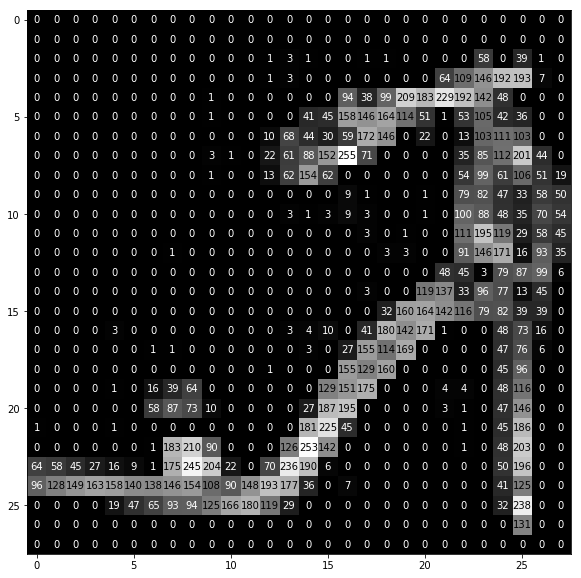

In [14]:
# Grafico primer sandalia (a esta sandalia la llamaremos sandalia 0)
visualize_input(primer_sandalia)
plt.show()

- Notar que cada pixel esta representado por un numero entre 0 y 255.
- 0 indica negro
- 255 indica blanco
- Los valores intermedios son los grises entre negro y blanco

## Grafico imagen

In [15]:
from matplotlib import pyplot as plt

Podemos graficar cada imagen directamente con la función imshow de matplotlib

Por ejemplo grafiquemos la sandalia 10

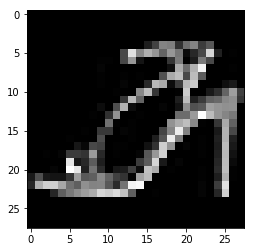

In [16]:
# cmap es lo que se denomina colormap. Le estamos indicando que 
# grafique los valores entre 0 y 255 como estala de grises
plt.imshow(sandalias[10], cmap='gray')
plt.show()

O el buzo 5:

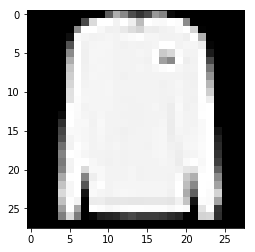

In [17]:
plt.imshow(buzos[5], cmap='gray')
plt.show()

### Ejercicio 1: 
Que valor tiene el pixel (20,5) del buzo 18? (Donde 20 es la fila y 5 es la columna)

In [18]:
print(buzos[18, 20, 5])

216


### Ejercicio 2:
Imprimir los valores de los 4 pixeles centrales de la sandalia 10:

In [19]:
print(sandalias[10, 13:15, 13:15])

[[0 2]
 [2 0]]


### Ejercicio 3:
Imprimir los valores de los 4 pixeles centrales del buzo 5:

In [20]:
print(buzos[5, 13:15, 13:15])

[[242 242]
 [242 242]]


## Histograma de una imagen
** Nuestra estimación de la función de masa de probabilidad **

### Probabilidad de algún pixel = 0
(Alguno de los 784 pixeles)

Trabajaremos con la sandalia 10 y el buzo 5

Que tan probable es que agarre un pixel al azar de la sandalia 10 y me de 0?

Cuantos pixeles tenemos en la sandalia 10?:

In [21]:
sandalias[10].shape

(28, 28)

In [22]:
total_pixeles_imagen = sandalias[10].shape[0]*sandalias[10].shape[1]
print(total_pixeles_imagen)

784


Cuantos pixels en cero tiene la sandalia 10?

In [23]:
pixeles_en_cero_10 = (sandalias[10] == 0).sum()
print(pixeles_en_cero_10)

528


La estimación de la probabilidad es:

In [24]:
p_0_sand_10 = pixeles_en_cero_10/total_pixeles_imagen
print(p_0_sand_10)

0.673469387755102


Cual es la probabilidad de un cero en el buzo 5?

In [18]:
# Hacemos los mismo ahora con el buzo 5
p_0_buzo_5 = (buzos[5] == 0).sum() / total_pixeles_imagen
print(p_0_buzo_5)

0.341836734694


### Histograma de una imagen
Ahora no solo trabajemos con la probabilidad de que sea cero sino cualquier otro valor posible en el espacio muestral: [0, 255]

In [19]:
hist_sandalia_10 = []
pixeles = list(range(niveles))
for pixel in pixeles:
    # notar sandalias[10] == pixel, donde pixel va de 0 a 255
    prob_sand_10_pixel = (sandalias[10] == pixel).sum() / total_pixeles_imagen
    hist_sandalia_10.append(prob_sand_10_pixel)

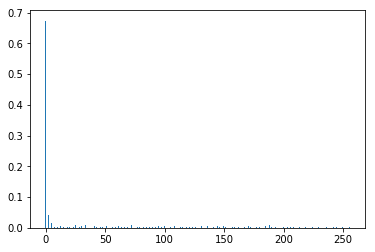

In [20]:
# Como es de esperar el cero es el mas probable
plt.bar(pixeles, hist_sandalia_10)
plt.show()

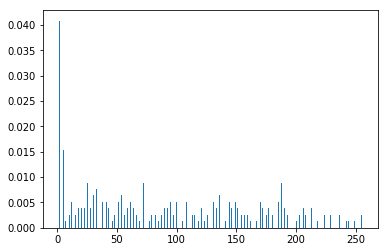

In [21]:
# Graficamos desde la segunda muestra para ver detalles del resto del histograma
plt.bar(pixeles[1:], hist_sandalia_10[1:])
plt.show()

Lo mismo para el buzo 5:

In [22]:
hist_buzo_5 = []
for pixel in pixeles:
    prob_buzo_5_pixel = (buzos[5] == pixel).sum() / total_pixeles_imagen
    hist_buzo_5.append(prob_buzo_5_pixel)

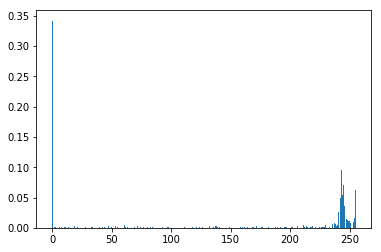

In [23]:
# Notar que a pesar de que el cero es el mas probable, tambien ya se ven altas componentes 
# en grises claros
plt.bar(pixeles, hist_buzo_5)
plt.show()

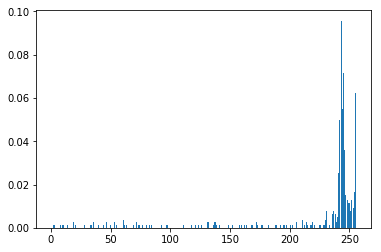

In [24]:
plt.bar(pixeles[1:], hist_buzo_5[1:])
plt.show()

## Histograma de una Clase
Mejoramos estimación
### Probabilidad de algún pixel = 0
En todo el dataset de sandalias o buzos.

Podemos mejorar la probabilidad de tener un pixel en cero para un buzo usando todos los buzos, y lo mismo para las sandalias

Cual es la estimación de la probabilidad de obtener un cero un cualquier sandalia?

Cuantos pixeles vamos a analizar:

Todos los pixeles de las sandalias: 6000x28x28

In [25]:
# como hay la misma cantidad de imagenes para sandalias y buzos, habrá la misma cantidad de pixeles
total_pixeles = sandalias.shape[0]*sandalias.shape[1]*sandalias.shape[2]
print(total_pixeles)

4704000


In [26]:
# Notar que a diferencia del anterior aca no indexo a sandalias, ya que quiero todas
pixeles_en_cero = (sandalias == 0).sum()

In [27]:
p_0_sandalia = pixeles_en_cero / total_pixeles
print(p_0_sandalia)

0.678858630952


Es interesante notar que la primer sandalia era representativa del total de sandalias ya que la estimación de la probabilidad da similar

Veamos en los buzos:

In [28]:
p_0_buzos = (buzos == 0).sum() / total_pixeles
print(p_0_buzos)

0.35128125


### Histograma de toda la clase
La clase puede ser buzo o sandalia. Y consideramos cualquier valor de gris entre 0 y 255 (No solo el cero)

Para sandalias:

In [29]:
hist_sandalias = []
for pixel in pixeles:
    # notar sandalias == pixel
    prob_sand_pixel = (sandalias == pixel).sum() / total_pixeles
    hist_sandalias.append(prob_sand_pixel)

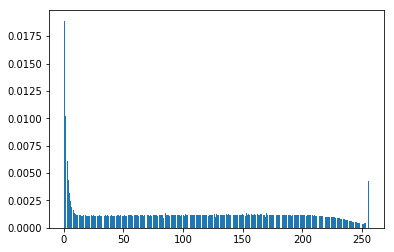

In [30]:
# Sacamos el cero por claridad
plt.bar(pixeles[1:], hist_sandalias[1:])
plt.show()

Para buzos:

In [31]:
hist_buzos = []
for pixel in pixeles:
    prob_buzos_pixel = (buzos == pixel).sum() / total_pixeles
    hist_buzos.append(prob_buzos_pixel)

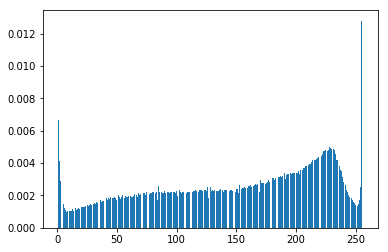

In [32]:
# Sacamos el cero por claridad
plt.bar(pixeles[1:], hist_buzos[1:])
plt.show()

** La diferencia entonces de estos histogramas es que son la estimación de la función de masa de probabilidad de los buzos o sandalias hecha sobre todas las imagenes. Los primeros eran sobre la sandalia 10 y el buzo 5 **

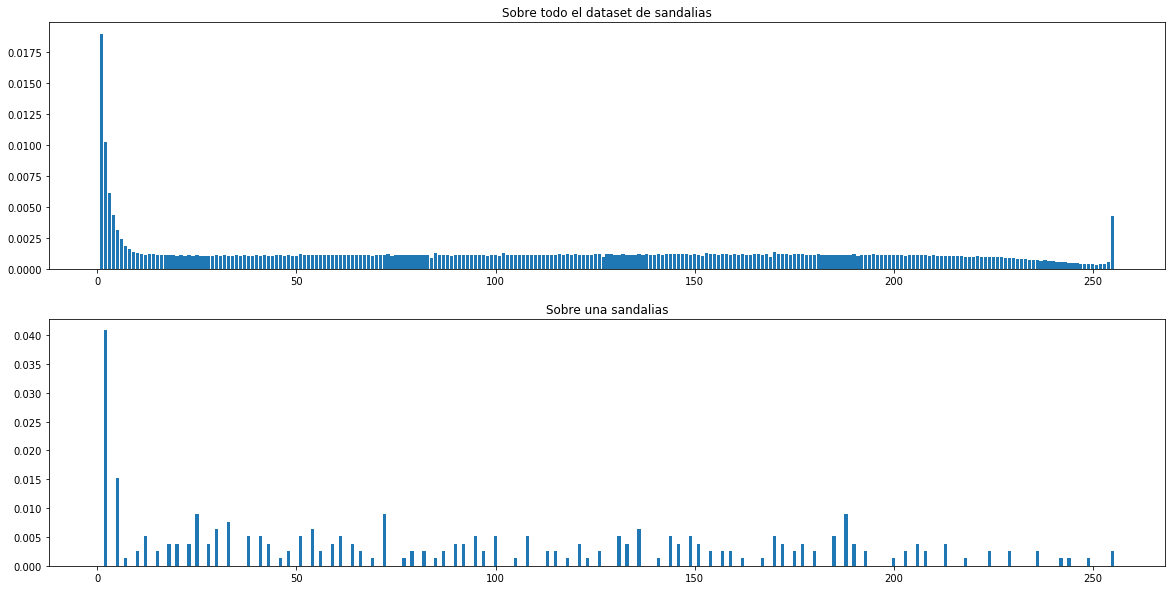

In [33]:
f, ax= plt.subplots(2,1, figsize=(20,10))
ax[0].bar(pixeles[1:], hist_sandalias[1:])
ax[0].set_title('Sobre todo el dataset de sandalias')
ax[1].bar(pixeles[1:], hist_sandalia_10[1:])
ax[1].set_title('Sobre una sandalias')
plt.show()

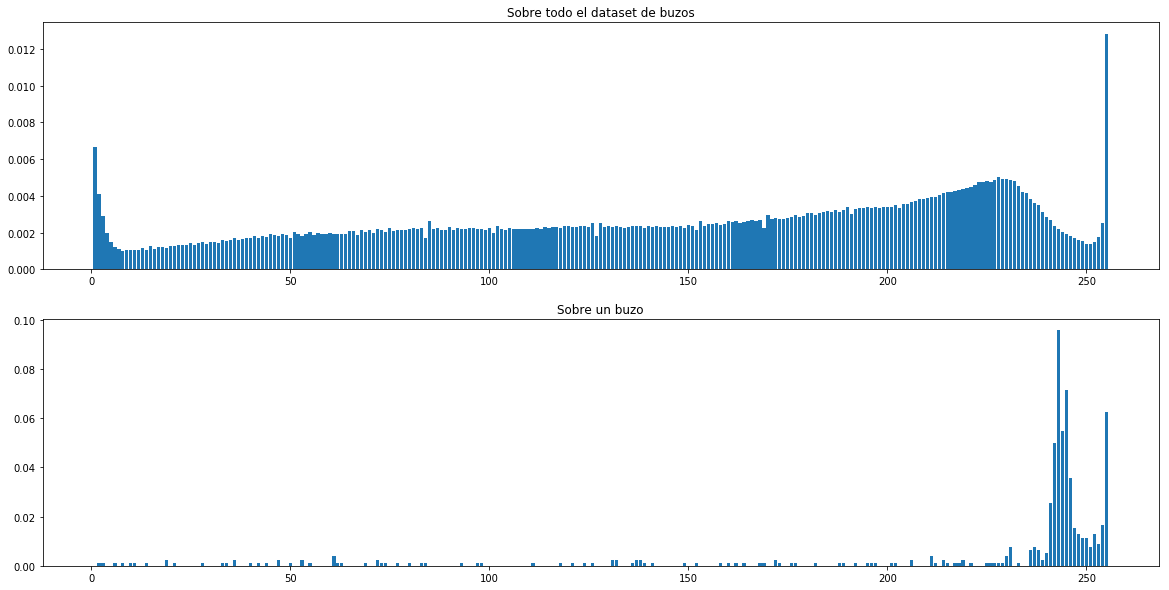

In [34]:
f, ax= plt.subplots(2,1, figsize=(20,10))
ax[0].bar(pixeles[1:], hist_buzos[1:])
ax[0].set_title('Sobre todo el dataset de buzos')
ax[1].bar(pixeles[1:], hist_buzo_5[1:])
ax[1].set_title('Sobre un buzo')
plt.show()

### Que podríamos hacer con esto?
Cuando me dan una imagen nueva y tengo que clasificarla como buzo o sandalia el procedimiento sería:
- Calculo el histograma de la imagen
- Lo comparo contra el de las sandalias de todo el dataset
- Lo comparo contra el de los buzos de todo el dataset
- Si se "parece más" al de los buzos es buzo, si no es sandalia.

Obviamente este método no es preciso y tampoco definimos que significa comparar dos histogramas.

Una de las falencias es que si la imagen esta *invertida*, nosotros seguiriamos reconociendo la imagen pero nuestro algoritmo seguramente fallaría:

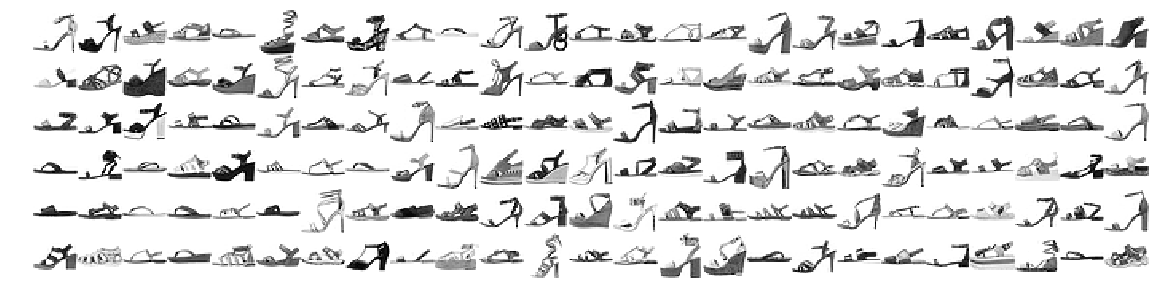

In [35]:
# Sandalias invertidas
plot_images(255-sandalias,150, columns=25)

## Histograma de un pixel por clase
Una posibilidad es hacer un histograma por cada pixel

Nota: hablaremos de probabilidades, pero siempre son estimaciones de las probabilidades

Cual es la probabilidad de que el pixel (14, 14) sea negro dado que es una sandalia?

In [36]:
p_14_14_0_sand = (sandalias[:, 14, 14] == 0).sum()/sandalias.shape[0]
print(p_14_14_0_sand)

0.457833333333


Formalmente:  
$P(pix_{14,14}=0 \ |\  Sandalia) = 0.457833$

Con los buzos:

In [37]:
p_14_14_0_buzos = (buzos[:, 14, 14] == 0).sum()/buzos.shape[0]
print(p_14_14_0_buzos)

0.00533333333333


Formalmente:  
$P(pix_{14,14}=0 \ |\  Buzo) = 0.00533$

Como lo usamos:

Supongamos que nos dan una imagen, observo el punto 14, 14 y es un cero. Cual elijo?

Buzo o sandalia?

En este caso es claro intuitivamente, pero formalmente queremos ver si la probabilidad de la sandalia dado que observe un cero en la posición 14, 14 es mas alta que la del buzo:

¿$P(Sandalia \ |\  pix_{14,14}=0) > P(Buzo \ |\  pix_{14,14}=0)?$

Por bayes:

$P(Sandalia \ |\  pix_{14,14}=0) = \huge\frac{P(pix_{14,14}=0 \ |\ Sandalia ) P(Sandalia)}{P(pix_{14,14}=0)}$

In [38]:
# Probabilidad total
P_pix_14_14_0 = ((sandalias[:, 14, 14]==0).sum() + (buzos[:, 14, 14]==0).sum()) / (len(sandalias) + len(buzos))
P_pix_14_14_0

0.23158333333333334

In [39]:
# Probabilidad a priori
P_sandalia = len(sandalias)/(len(sandalias)+len(buzos)) #6000/12000
P_sandalia

0.5

In [40]:
P_sandialia_pix_14_14_0 = p_14_14_0_sand*P_sandalia/P_pix_14_14_0
print(P_sandialia_pix_14_14_0)

0.988485066571


Para el buzo:

In [41]:
# Probabilidad a priori
P_buzo = len(buzos)/(len(sandalias)+len(buzos)) #6000/12000
P_buzo

0.5

In [42]:
P_buzo_pix_14_14_0 = p_14_14_0_buzos*P_buzo/P_pix_14_14_0
print(P_buzo_pix_14_14_0)

0.0115149334293


In [43]:
P_buzo_pix_14_14_0 + P_sandialia_pix_14_14_0

1.0

### Histograma del punto 14, 14
Y si observo otro valor?
No observamos un cero si no cualquier otro de los 255 posibles restantes

#### Sandalias

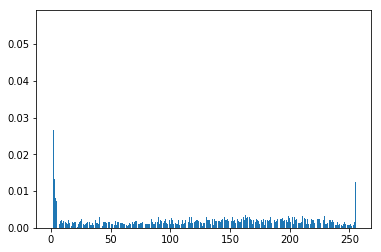

In [44]:
p_14_14_sand = []
for pixel in pixeles:
    p_14_14_sand.append((sandalias[:, 14, 14] == pixel).sum()/sandalias.shape[0])
plt.bar(pixeles[1:], p_14_14_sand[1:])
plt.show()

In [45]:
np.array(p_14_14_sand).sum()

1.0

#### Buzos

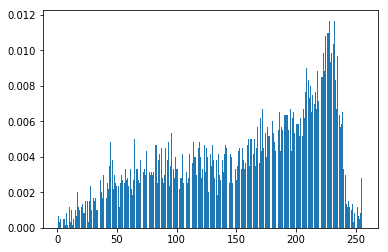

In [46]:
p_14_14_buzos = []
for pixel in pixeles:
    p_14_14_buzos.append((buzos[:, 14, 14] == pixel).sum()/buzos.shape[0])
plt.bar(pixeles[1:], p_14_14_buzos[1:])
plt.show()

In [47]:
np.array(p_14_14_buzos).sum()

1.0

In [48]:
def prob_sand_pixel(valor, posx=14, posy=14):
    # Probabilidad de sandalia dado que el punto x, y tiene el valor: valor
    total_imagenes = len(sandalias) + len(buzos)
    P_sandalia = len(sandalias)/total_imagenes
    p_x_y_sand = (sandalias[:, posx, posy] == valor).sum()/len(sandalias)
    # Probabilidad total
    P_x_y = ((sandalias[:, posx, posy]==valor).sum() 
                         + (buzos[:, posx, posy]==valor).sum()) / total_imagenes
    return p_x_y_sand*P_sandalia/P_x_y

def prob_buzo_pixel(valor, posx=14, posy=14):
    # Probabilidad de buzo dado que el punto x, y tiene el valor: valor
    total_imagenes = len(sandalias) + len(buzos)
    P_buzo = len(buzos)/total_imagenes
    p_x_y_buzo = (buzos[:, posx, posy] == valor).sum()/len(buzos)
    # Probabilidad total
    P_x_y = ((sandalias[:, posx, posy]==valor).sum() 
                         + (buzos[:, posx, posy]==valor).sum()) / total_imagenes
    return p_x_y_buzo*P_buzo/P_x_y

In [55]:
valor = 251 # Probar con distintos valores
prob_sand_pixel(valor), prob_buzo_pixel(valor)

(0.5, 0.5)

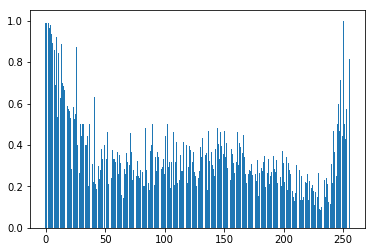

In [56]:
# La probabilidad del punto (14,14) para todos los valores posibles
p_sand_final = [prob_sand_pixel(valor) for valor in pixeles]
plt.bar(pixeles, p_sand_final)
plt.show()

Algo bastante inesperado? Si obtengo valores observados altos en la posición (14,14) tambien hay alta probabilidad de que sea sandalia.

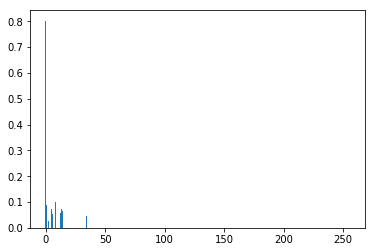

In [57]:
# La probabilidad del punto (5,5) para todos los valores posibles
p_sand_final = [prob_sand_pixel(valor, 5, 5) for valor in pixeles]
plt.bar(pixeles, p_sand_final)
plt.show()

Estaría indicando que para el punto (5,5) casi siempre decido por buzo, salvo si el valor observado es 0

## Probabilidad Conjunta: Más de un pixel
Como deberíamos hacer para tener en cuenta mas de un pixel. Idealmente todos los pixeles observados

Analicemos el caso de que obtengo una imagen y veo dos pixeles de la imagen. Con eso quiero determinar si fue una sandalia o un buzo.

$X = Pix_{13, 14}$

$Y = Pix_{14, 14}$

$P(Sandalia\ |\ X, Y)\ P(X, Y) = P(Sandalia, X, Y) = P(X,Y\ |\ Sandalia)\ P(Sandalia)$

$P(Sandalia\ |\ X, Y)\ = \large \frac{P(X,Y\ |\ Sandalia)\ P(Sandalia)}{P(X, Y)}$

Que es P(X,Y)? Es la probabilidad por ejemplo, de que uno de los puntos sea 0 y el otro 1. O cualquiera de las combinaciones posibles de valores que pueden tomar los puntos X e Y

$P(X=0, Y=0)\ =\ ?$  
$P(X=1, Y=0)\ =\ ?$  
$P(X=2, Y=0)\ =\ ?$  
...  
$P(X=255, Y=0)\ =\ ?$  
$P(X=0, Y=1)\ =\ ?$  
$P(X=1, Y=1)\ =\ ?$  
$P(X=2, Y=1)\ =\ ?$  
...  
$P(X=255, Y=1)\ =\ ?$  

Cual es el espacio muestral para 2 pixeles?

In [58]:
espacio_muestral = np.stack(np.meshgrid(pixeles, pixeles)).T.reshape(-1,2)

In [59]:
# Notar que la cantidad de posibilidades es la cantidad de intensidades de gris al cuadrado
espacio_muestral.shape

(65536, 2)

In [60]:
espacio_muestral[:30]

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       [ 0,  3],
       [ 0,  4],
       [ 0,  5],
       [ 0,  6],
       [ 0,  7],
       [ 0,  8],
       [ 0,  9],
       [ 0, 10],
       [ 0, 11],
       [ 0, 12],
       [ 0, 13],
       [ 0, 14],
       [ 0, 15],
       [ 0, 16],
       [ 0, 17],
       [ 0, 18],
       [ 0, 19],
       [ 0, 20],
       [ 0, 21],
       [ 0, 22],
       [ 0, 23],
       [ 0, 24],
       [ 0, 25],
       [ 0, 26],
       [ 0, 27],
       [ 0, 28],
       [ 0, 29]])

In [61]:
# La sandalia cero tiene dos ceros en la posición:
# filas 13:14, columna 14
X = [13, 14]
Y = [14, 14]
Rows = np.array([X[0], Y[0]])
Cols = np.array([X[1], Y[1]])
print(Rows, Cols)
print(sandalias[0,Rows,Cols])
sandalias[0,Rows,Cols] == [0, 0]

[13 14] [14 14]
[0 0]


array([ True,  True], dtype=bool)

In [62]:
# Todas las sandalias y su coincidencia con un [0, 0]
sandalias[:,Rows,Cols] == [0, 0]

array([[ True,  True],
       [False,  True],
       [False,  True],
       ..., 
       [False, False],
       [ True,  True],
       [ True,  True]], dtype=bool)

In [63]:
# Sumo los true en el eje 1
(sandalias[:,Rows,Cols] == [0, 0]).sum(axis=1)

array([2, 1, 1, ..., 0, 2, 2])

In [64]:
# Los comparo con 2 por que los dos tienen que coincidir (Es la conjunta)
((sandalias[:,Rows,Cols] == [0,0]).sum(axis=1) == 2).sum()

1926

In [65]:
P_0_0_sand = ((sandalias[:,Rows,Cols] 
               == [0,0]).sum(axis=1) == 2).sum()/sandalias.shape[0]
P_0_0_sand

0.32100000000000001

In [66]:
def prob_2_pixels(clase, pixels, X = [13, 14], Y = [14, 14]):
    # Clase puede ser sandalias o buzos. Es el listado de imagenes
    # Pixels son los valores de los pixeles adyacentes
    Rows = np.array([X[0], Y[0]])
    Cols = np.array([X[1], Y[1]])
    return ((clase[:,Rows,Cols] == pixels).sum(axis=1) == 2).sum()/clase.shape[0]

In [67]:
# Probabilidad de observar los pixeles 0, 0 en las posiciones 
# 13, 14 vertical, 14 horizontal dado que es sandalia
prob_2_pixels(sandalias, [0,0])

0.32100000000000001

In [68]:
# Probabilidad de que el punto X sea igual a 140 y el Y sea igual a 120
prob_2_pixels(sandalias, [140,120], X = [10, 10], Y = [10, 11])

0.0

In [69]:
# Ahora para los buzos
# Probabilidad de observar los pixeles 0, 0 en las posiciones 
# 13, 14 vertical, 14 horizontal dado que es buzo
prob_2_pixels(buzos, [0,0], X = [13, 14], Y = [14, 14])

0.0018333333333333333

In [70]:
# Calculo de toda la conjunta
def get_joint(clase, X = [13, 14], Y = [14, 14]):
    conjunta_clase = []
    # Recorro todo el espacio muestral
    for pixs in espacio_muestral:
        conjunta_clase.append(prob_2_pixels(clase, pixs, X = X, Y = Y))
    return np.array(conjunta_clase)

In [71]:
%time conjunta_buzos = get_joint(buzos, X = [13, 14], Y = [14, 14])

CPU times: user 8.32 s, sys: 47.8 ms, total: 8.36 s
Wall time: 8.52 s


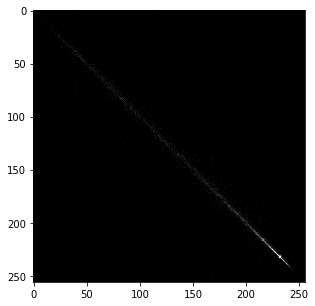

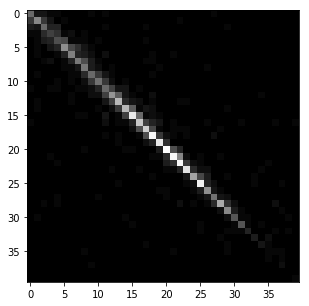

In [72]:
plt.figure(figsize=(5,5))
plt.imshow(conjunta_buzos.reshape(256, 256), cmap='gray')
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(conjunta_buzos.reshape(256, 256)[210:250, 210:250], cmap='gray')
plt.show()

In [73]:
%time conjunta_sand = get_joint(sandalias, X = [13, 14], Y = [14, 14])

CPU times: user 7.97 s, sys: 34.9 ms, total: 8.01 s
Wall time: 8.09 s


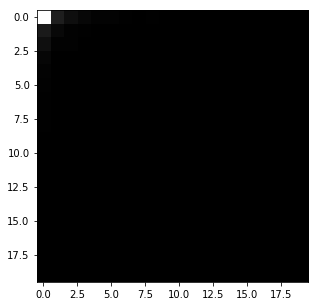

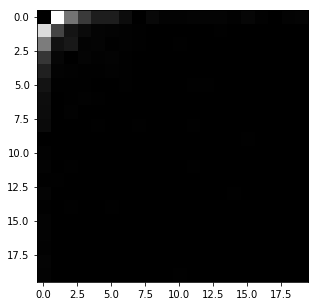

In [74]:
plt.figure(figsize=(5,5))
conjunta_sand_mod = conjunta_sand.copy()
conjunta_sand_mod[0] = 0
plt.imshow(conjunta_sand.reshape(256, 256)[:20, :20], cmap='gray')
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(conjunta_sand_mod.reshape(256, 256)[:20, :20], cmap='gray')
plt.show()

### Problemas

- Ya empieza a ser significativo el tiempo de calculo de la conjunta con solo 2 pixeles
- Que tan buena es la estimación?

In [75]:
# De cuantas combinaciones de puntos no tengo información?
prob_cero_n = (np.array(conjunta_sand) == 0).sum()
prob_cero_n

62916

In [76]:
prob_cero_n/(len(pixeles)*len(pixeles))

0.96002197265625

El 96% da probabilidad cero

In [77]:
dist_cero = len(pixeles)*len(pixeles) - prob_cero_n
dist_cero

2620

Tenemos solo 2620 salidas de nuestro espacio muestral de 65536 y tenemos que hacer estadistica con 6000 muestras!!!

In [78]:
len(sandalias)/dist_cero

2.2900763358778624

en promedio tengo menos de 3 ocurrencias por punto

In [79]:
for i in range(50):
    print(str(espacio_muestral[i]) + '\t' + str(conjunta_sand[i]))

[0 0]	0.321
[0 1]	0.0388333333333
[0 2]	0.0176666666667
[0 3]	0.00883333333333
[0 4]	0.0045
[0 5]	0.0045
[0 6]	0.00183333333333
[0 7]	0.0
[0 8]	0.00133333333333
[0 9]	0.0005
[ 0 10]	0.0005
[ 0 11]	0.000666666666667
[ 0 12]	0.000666666666667
[ 0 13]	0.000666666666667
[ 0 14]	0.000333333333333
[ 0 15]	0.001
[ 0 16]	0.000333333333333
[ 0 17]	0.0
[ 0 18]	0.0005
[ 0 19]	0.000666666666667
[ 0 20]	0.000333333333333
[ 0 21]	0.000333333333333
[ 0 22]	0.0
[ 0 23]	0.0
[ 0 24]	0.000833333333333
[ 0 25]	0.0005
[ 0 26]	0.000166666666667
[ 0 27]	0.000166666666667
[ 0 28]	0.0
[ 0 29]	0.000666666666667
[ 0 30]	0.000333333333333
[ 0 31]	0.000333333333333
[ 0 32]	0.000666666666667
[ 0 33]	0.000166666666667
[ 0 34]	0.0
[ 0 35]	0.000166666666667
[ 0 36]	0.0
[ 0 37]	0.000833333333333
[ 0 38]	0.000666666666667
[ 0 39]	0.0005
[ 0 40]	0.000333333333333
[ 0 41]	0.000333333333333
[ 0 42]	0.000333333333333
[ 0 43]	0.0
[ 0 44]	0.000166666666667
[ 0 45]	0.000166666666667
[ 0 46]	0.000333333333333
[ 0 47]	0.00016666

### Condiciones ideales
- Velocidad de procesamiento infinita
- Tamaño del dataset tan grande como quiera

En estas condiciones puedo calcular la conjunta. Y por que es tan importante?

** Si tengo la conjunta tengo todo **

Que puedo sacar de la conjunta?

Supongamos que nos dan una imagen y observamos que los pixeles 13, 14 son [0, 1]. Por eso lo que quiero saber es que es mas probable: Una sanadalia o un buzo?

$P(Sandalia \ |\  pix_{[13,14], 14}=[0, 1]) = \large\frac{P(pix_{[13,14], 14}=[0, 1] \ |\ Sandalia ) P(Sandalia)}{P(pix_{[13,14], 14}=[0, 1])}$

Si X es pixel 13 e Y el 14 de la columna 14 entonces:

$P(Sandalia \ |\  X=0, Y=1) = \large\frac{P(X=0, Y=1 \ |\ Sandalia ) P(Sandalia)}{P(X=0, Y=1)}$

Tenemos todo!

In [80]:
# Como P(Sandalia) y P(Buzo) son iguales y el denominador tambien, basta con calcular el lilelihood
pixels = [0, 1]
prob_2_pixels(sandalias,pixels), prob_2_pixels(buzos,pixels)

(0.038833333333333331, 0.00016666666666666666)

Pero en este caso, si le sacamos las idealizaciones, que problema tenemos?

In [81]:
# Tomo una imagen y obervo los valores 10, 56
pixels = [10, 56]
prob_2_pixels(sandalias,pixels), prob_2_pixels(buzos,pixels)

(0.0, 0.0)

Las probabilidades para la mayoría de las combinaciones del espacio muestral son cero tanto para la sandalia como para el buzo. Es esto razonable?

Si vinieran imagenes nuevas con alguna de estas combinaciones, no podría decidir. Ambas son iguales de probables

Conclusiones:

Intenté construir un modelo mejor pero al final solo me sirve para un porcentaje muy bajo de combinaciones... 

(Vale aclarar que uno podría argumentar que es posible que las combinaciones que no aparecieron en el dataset probablemente no aparezcan en las imagenes nueva. Pero... es esto razonable en esta aplicación?)

Sería interesante imaginar que pasa si ahora quiero armar una conjunta con 3 puntos!!! Todo los problemas se potenciarían

## Independencia -> Naive Bayes

Una de las formas de encarar el problema en casos donde la cantidad de ejemplos (imagenes) no es suficiente para estimar la conjunta puede ser suponer independencia:

$P(Sandalia \ |\  pix_{[13,14], 14}=[0, 1]) = \large\frac{P(pix_{[13,14], 14}=[0, 1] \ |\ Sandalia ) P(Sandalia)}{P(pix_{[13,14], 14}=[0, 1])}$

Suponiendo independencia:

$P(Sandalia \ |\  pix_{[13,14], 14}=[0, 1]) = \large\frac{P(pix_{13, 14}=0 \ |\ Sandalia )P(pix_{14, 14}=1 \ |\ Sandalia ) P(Sandalia)}{P(pix_{[13,14], 14}=[0, 1])}$

$P(Sandalia \ |\  X=0, Y=1) = \large\frac{P(X=0 \ |\ Sandalia )P(Y=1 \ |\ Sandalia ) P(Sandalia)}{P(X=0, Y=1)}$

Para buzo

$P(Buzo \ |\  X=0, Y=1) = \large\frac{P(X=0 \ |\ Buzo )P(Y=1 \ |\ Buzo ) P(Buzo)}{P(X=0, Y=1)}$

Notar que no voy a tener necesidad de calcular el denominador y que el numerador ya lo tenía calculado de la primer parte

In [82]:
def prob_pixel_clase(clase, valor, posx=14, posy=14):
    p_x_y_sand = (clase[:, posx, posy] == valor).sum()/len(clase)
    return p_x_y_sand

In [83]:
# Usamos [10, 56] que eran uno de los muchos valores de pixeles que daban cero para ambos (Sandalia, buzo)
# Para las sandalias
print('prob que la posición 13, 14 tenga un valor de 10 (para sanadalia):', 
      prob_pixel_clase(sandalias, 10, 13, 14))
print('prob que la posición 14, 14 tenga un valor de 10 (para sanadalia):', 
      prob_pixel_clase(sandalias, 56, 14, 14))
print('prob conjunta suponiendo independencia (para sanadalia):', 
      prob_pixel_clase(sandalias, 10, 13, 14)*prob_pixel_clase(sandalias, 56, 14, 14))

prob que la posición 13, 14 tenga un valor de 10 (para sanadalia): 0.000833333333333
prob que la posición 14, 14 tenga un valor de 10 (para sanadalia): 0.0015
prob conjunta suponiendo independencia (para sanadalia): 1.25e-06


In [84]:
print('prob que la posición 13, 14 tenga un valor de 10 (para buzo):', 
      prob_pixel_clase(buzos, 10, 13, 14))
print('prob que la posición 14, 14 tenga un valor de 10 (para buzo):',
      prob_pixel_clase(buzos, 56, 14, 14))
print('prob conjunta suponiendo independencia (para buzo):', 
      prob_pixel_clase(buzos, 10, 13, 14)*prob_pixel_clase(buzos, 56, 14, 14))

prob que la posición 13, 14 tenga un valor de 10 (para buzo): 0.000666666666667
prob que la posición 14, 14 tenga un valor de 10 (para buzo): 0.0025
prob conjunta suponiendo independencia (para buzo): 1.66666666667e-06


En este caso entonces me quedo con que dado los valores [10, 56] de los puntos 13, 14, decido por un buzo ya que 1.66666666667e-06>1.25e-06

Notar que no estoy considerando la P(Buzo) ni la P(Sandalia), ni el denominador

### Escalamos a toda la imagen

Recien solo consideramos 2 pixeles, consideremos todos los pixeles

Podemos hacerlo a toda la imagen, 28x28 pixeles. Lo unico que tenemos que hacer es multiplicarlos y comparar.

Que potenciales problemas aparecen?

In [85]:
np.power(0.1, 784)

0.0

Voy a terminar multiplicando probabilidades que seguramente sean bajas 784 veces entre si.

Problemas numericos -> El logaritmo al rescate

In [86]:
np.log(0.1)*784

-1805.2267129073316

Cual puede ser el problema de hacer logaritmo?

Si una probabilidad es cero, log(0) no existe

In [87]:
np.log(0)

/Users/julianganzabal/anaconda3/envs/mllab/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

### Laplace smoothing
https://en.wikipedia.org/wiki/Additive_smoothing

$P(pix_{14,14} = 0\ |\ Sandalia) = \large\frac{N_{sandalias\ con\ 0\ en\ 14\ 14}}{N_{sandalias}}$

$P(pix_{14,14} = 0\ |\ Sandalia) = \huge\frac{N_{sandalias\ con\ 0\ en\ 14\ 14} \ + \ \alpha}{N_{sandalias}\ +\ 256\alpha}$

Si alpha es 1, es como suponer que a priori (antes de estimar) tenía uno de cada clase con distribución uniforme. Es decir cualquier intensidad de 0 a 255 era igual de probable

In [88]:
# Modificamos levente la funcion para evitar ceros de probabilidad
# Es la misma función definida mas arriba, la copio para tenerla a mano

def prob_pixel_clase(clase, valor, posx=14, posy=14, alpha=0):
    p_x_y_sand = ((clase[:, posx, posy] == valor).sum()+alpha)/(len(clase)+256*alpha)
    return p_x_y_sand


Sumamos alpha en el numerador y alpha*256  al denominador en la estimación de la probabilidad

In [89]:
prob_pixel_clase(sandalias, 10, 13, 14, 1), prob_pixel_clase(sandalias, 10, 13, 14, 0)

(0.00095907928388746806, 0.00083333333333333339)

## Modelo generador

Supongamos que vamos a generar 4 puntos de la imagen:  
X = (13, 13), Y = (13, 14), Z = (14, 13), W = (14, 14)

Todas las probabilidades tienen la condición de la clase, en nuestro ejemplo sería el buzo o la sandalia. No la ponemos para simplificar la notación.

### Suponiendo independencia

$P(X, Y, Z, W)= P(X)\ P(Y)\ P(Z)\ P(W)$

Cada punto lo genero de manera independiente

Estrictamente si quiero generar un buzo:

$P(X, Y, Z, W\ |\ buzo)= P(X\ |\ buzo)\ P(Y\ |\ buzo)\ P(Z\ |\ buzo)\ P(W\ |\ buzo)$

En este caso mi modelo generador solo depende de la clase y no de las muestras generadas anteriormente. En nuestro caso, cualquier punto de la imagen se genera solamente teniendo en cuenta que es un buzo o una sandalia y no en que puntos se generaron anteriormente

In [93]:
def get_hist(clase, posx, posy, colors=256):
    hist = []
    for val in range(colors):
        hist.append((clase[:, posx, posy] == val).sum()/clase.shape[0])
    return np.array(hist)

In [103]:
def generate_image(clase, sample_type='argmax', saltear = 0):
    imagen_gen = []
    for i in range(28*28):
        y = i%28
        x = i // 28
        histog = get_hist(clase, x,y)[saltear:]
        if sample_type=='argmax':
            imagen_gen.append(np.argmax(histog))
        else:
            imagen_gen.append(np.random.multinomial(1, histog))
    return np.array(imagen_gen).reshape(28,28)

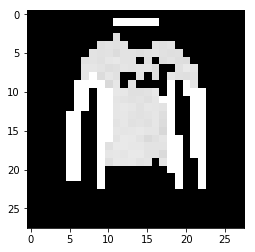

In [143]:
plt.imshow(generate_image(buzos, saltear= 0), cmap = 'gray')
plt.show()

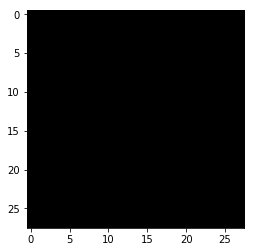

In [104]:
plt.imshow(generate_image(sandalias, saltear= 0), cmap = 'gray')
plt.show()

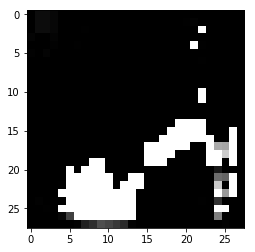

In [145]:
plt.imshow(generate_image(sandalias, saltear= 1), cmap = 'gray')
plt.show()

### Conjunta sin independencia

$P(X, Y, Z, W)= P(X)\ P(Y\ |\ X)\ P(Z\ |\ X,Y)\ P(W\ |\ X,Y,Z)$

El primer punto lo genero independiente pero luego cada punto a generar dependera de los valores de los puntos generados previamente

Estrictamente si es un buzo la ecuación quedará:

$P(X, Y, Z, W\ |\ buzo)= P(X\ |\ buzo)\ P(Y\ |\ X, buzo)\ P(Z\ |\ X,Y, buzo)\ P(W\ |\ X,Y,Z, buzo)$

En este ejemplo, el modelo generador depende de la clase (buzo o sandalia) y ademas cada punto depende del anterior

## Para pensar

Tengo que si o si siempre plantear un modelo generador para hacer clasificación?

Se les ocurre alguna manera de estimar la $P(Clase|x_1, x_2, ..., x_N)$ de otra forma. No necesariamente generativa?

**Modelo discriminativo**

## Naive bayes gaussiano

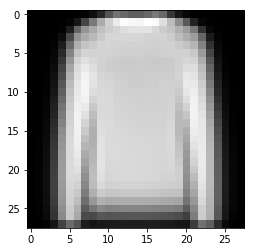

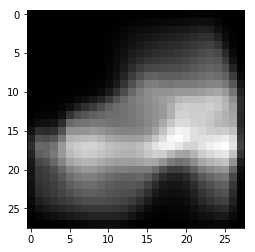

In [162]:
plt.imshow(buzos.mean(axis=0), cmap='gray')
plt.show()
plt.imshow(sandalias.mean(axis=0), cmap='gray')
plt.show()

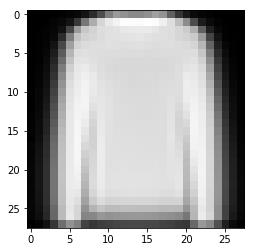

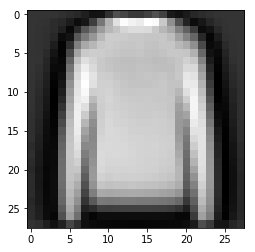

In [165]:
plt.imshow(buzos.mean(axis=0)+buzos.std(axis=0), cmap='gray')
plt.show()
plt.imshow(buzos.mean(axis=0)-buzos.std(axis=0), cmap='gray')
plt.show()

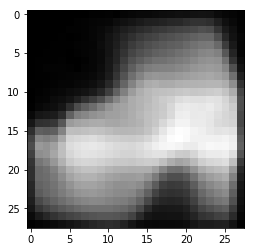

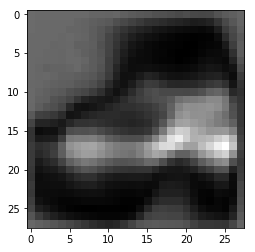

In [166]:
plt.imshow(sandalias.mean(axis=0)+sandalias.std(axis=0), cmap='gray')
plt.show()
plt.imshow(sandalias.mean(axis=0)-sandalias.std(axis=0), cmap='gray')
plt.show()

In [234]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

### Armo training set y cargo testing

In [396]:
train_images = np.vstack([sandalias, buzos])
train_labels = np.hstack([np.zeros(sandalias.shape[0]), np.ones(buzos.shape[0])]).astype(int)
buzos_test = np.load('buzos_test.npy')
sandalias_test = np.load('sandalias_test.npy')

In [237]:
train_images.shape, train_labels.shape

((12000, 28, 28), (12000,))

In [556]:
from HistogramBasedNaiveBayes import HistogramBasedNaiveBayes as HistogramBasedNaiveBayes

In [557]:
histogramBasedNaiveBayes_clf = HistogramBasedNaiveBayes()

In [558]:
data_reshaped = train_images.reshape(train_images.shape[0],-1)
%time histogramBasedNaiveBayes_clf.fit(data_reshaped, train_labels)

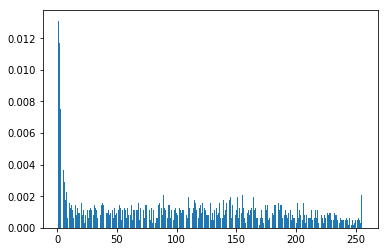

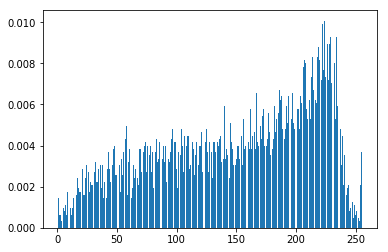

In [552]:
plt.bar(histogramBasedNaiveBayes_clf.sample_space_[1:],histogramBasedNaiveBayes_clf.histograms_matrix_[0, 183][1:])
plt.show()
plt.bar(histogramBasedNaiveBayes_clf.sample_space_[1:],histogramBasedNaiveBayes_clf.histograms_matrix_[1, 183][1:])
plt.show()

In [553]:
print(histogramBasedNaiveBayes_clf.class_count_)
print(histogramBasedNaiveBayes_clf.class_prior_)
print(histogramBasedNaiveBayes_clf.sample_space_.shape)
print(histogramBasedNaiveBayes_clf.histograms_matrix_.shape)

[6000 6000]
[ 0.5  0.5]
(256,)
(2, 784, 256)


In [564]:
y_predicted = histogramBasedNaiveBayes_clf.predict(data_reshaped)

In [566]:
(y_predicted == train_labels).sum()/train_labels.shape[0]

0.99750000000000005

### Naive Bayes Multinomial con Sklearn

In [313]:
train_images.reshape(train_images.shape[0],-1 ).shape

(12000, 784)

In [339]:
clf = MultinomialNB(alpha=1)
clf.fit(train_images.reshape(train_images.shape[0],-1 ), train_labels)
(clf.predict(train_images.reshape(train_images.shape[0],-1 )) == train_labels).sum()/train_images.shape[0]

0.99033333333333329

In [348]:
clf.feature_log_prob_[0].shape

(784,)

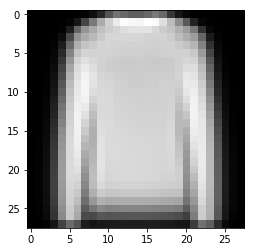

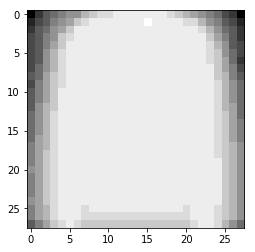

In [353]:
sel_class = 1
plt.imshow(clf.feature_count_.astype(int)[sel_class].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(clf.feature_log_prob_.astype(int)[sel_class].reshape(28,28), cmap='gray')
plt.show()

In [331]:
clf.coef_

array([[-19.23573844, -16.21531355, -14.37592603, -13.51871074,
        -12.52338995, -11.98050033, -11.1578257 ,  -9.91506493,
         -8.78496798,  -7.86264992,  -7.10536503,  -6.79454426,
         -6.87481393,  -6.97952178,  -6.9936232 ,  -6.90579687,
         -6.74558896,  -6.88631465,  -7.53468332,  -8.42854906,
         -9.57066672, -10.86368663, -11.79383171, -12.44339401,
        -13.98346501, -15.3039128 , -16.98444664, -19.92888562,
        -17.28982829, -15.3039128 , -14.24871301, -12.4016297 ,
        -11.51905494, -10.14830043,  -8.40495098,  -7.30173373,
         -6.74914052,  -6.39622085,  -6.20083781,  -6.07911954,
         -6.00839452,  -6.02821623,  -6.03979751,  -5.99636121,
         -6.01667312,  -6.13823349,  -6.30766758,  -6.59538164,
         -7.06135772,  -7.97161413,  -9.51987648, -11.18758934,
        -12.68394407, -14.33046366, -15.92155243, -17.09567227,
        -16.37353756, -14.7989869 , -13.38497377, -11.98439345,
        -10.31836072,  -8.14639114,  -6.

In [287]:
acc_buzos_mult = (clf.predict(buzos_test.reshape(buzos_test.shape[0],-1 )) == 1).sum()/buzos_test.shape[0]
acc_sand_mult = (clf.predict(sandalias_test.reshape(sandalias_test.shape[0],-1 )) == 0).sum()/sandalias_test.shape[0]
print(acc_buzos_mult, acc_sand_mult, (acc_buzos_mult+acc_sand_mult)/2)

1.0 0.985 0.9925


### Naive Bayes Gaussiano con Sklearn

In [292]:
clf_gaussian = GaussianNB()
clf_gaussian.fit(train_images.reshape(train_images.shape[0],-1 ), train_labels)
(clf_gaussian.predict(train_images.reshape(train_images.shape[0],-1 )) == train_labels).sum()/train_images.shape[0]

0.99516666666666664

In [304]:
# Medias
print(clf_gaussian.theta_.shape)
# varianzas (desvios)
print(clf_gaussian.sigma_.shape)
print('cantidad de parametros aprendidos:', np.product(clf_gaussian.theta_.shape) 
      + np.product(clf_gaussian.sigma_.shape))

(2, 784)
(2, 784)
cantidad de parametros aprendidos: 3136


In [288]:
acc_buzos_gauss = (clf_gaussian.predict(buzos_test.reshape(buzos_test.shape[0],-1 )) == 1).sum()/buzos_test.shape[0]
acc_sand_gauss = (clf_gaussian.predict(sandalias_test.reshape(sandalias_test.shape[0],-1 )) == 0).sum()/sandalias_test.shape[0]
print(acc_buzos_gauss, acc_sand_gauss, (acc_buzos_gauss+acc_sand_gauss)/2)

1.0 0.991 0.9955
